# Построение трехмерных графиков и анимации

Не забудьте выполнить задачи Контеста:
- [Контест](https://contest.yandex.ru/contest/76367/enter) для 413 группы;
- [Контест](https://contest.yandex.ru/contest/76368/enter) для 414 группы;
- [Контест](https://contest.yandex.ru/contest/76369/enter) для 415 группы;
- [Контест](https://contest.yandex.ru/contest/76369/enter) для 416 группы;

На предыдущих занятиях мы рассматривали исключительно двумерные статические графики. Однако, в некоторых ситуациях этого недостаточно. Например, при работе с моделями машинного обучения может потребоваться визуализировать поверхность, описываемую функцией ошибок, чтобы оценить вероятность попадания в локальный минимум в процессе обучения. Пока что ни одна из пройденных нами функций не позволяет строить визуализация подобного плана. Более того, в некоторых ситуациях может быть недостаточно статичной картинки и требуется анимация. Именно подобные виды визуализаций мы и разберем в рамках сегодняшнего занятия.

**Необходимые импорты:**

In [2]:
from functools import partial

import matplotlib.pyplot as plt
import numpy as np

from IPython.display import HTML
from matplotlib.animation import FuncAnimation

**Подготовительные шаги:**

In [ ]:
plt.style.use("ggplot")

## Двумерные графики трехмерных функций

Прежде чем переходить к построениею полноценных трехмерных графиков, рассмотрим возможности визуализации трехмерных функций в виде двумерных графиков. Во всех следующих примерах будем визуализировать следующую функцию:
$$f(x, y) = sin(x)^2 + cos(xy)cos(x), x \in [0, 5], y \in [0, 4]$$

In [ ]:
limits_abscissa = [0, 5]
limits_ordinate = [0, 4]

abscissa = np.linspace(*limits_abscissa, 500)
ordinates = np.linspace(*limits_ordinate, 400)

grid_x, grid_y = np.meshgrid(abscissa, ordinates)
print(
    f"grid_x:\n{grid_x};",
    f"gtid_y:\n{grid_y};",
    sep="\n\n",
)

grid_z = (
    np.sin(grid_x) ** 2 + np.cos(grid_x * grid_y) * np.cos(grid_x)
)

### contour

Одним из простейших способов визуализации трехмерной функции с помощью двумерного графика - построение линий уровня этой функции. Т.е. мы можем представить трехмерную функцию, как функцию двух переменных, выразив через них значения третьей координаты. После этого мы можем визуализировать на плоскости линии, вдоль которых значения этой функции двух переменных не изменяются.

В Matplotlib построение линий уровня функции двух переменных возможно с помощью функции `contour`. В качестве обязательных аргументов функция принимает значения абсцисс, ординат и аппликат. Построение линей уровня с помощью `contour` в простейшем виде выглядит так:

In [ ]:
_, axis = plt.subplots(figsize=(10, 8))
axis: plt.Axes

axis.contour(grid_x, grid_y, grid_z, colors="k")

По умолчанию Matplotlib сам выбирает оптимальное число уровней, а также значения этих уровней, на основе области значений аппликаты. Также обратим внимание на стили линий. На данном графике есть сплошные и пунктирные линии. С помощью разных стилей линий Matplotlib добавляет глубины в нашу визуализацию: сплошные линии соответствуют положительным значениям аппликаты, пунктирные - отрицательным.

В случае, если нас не устраивает выбор линий уровня, мы можем настроить множество отображаемых линий вручную. Для этого необходимо воспользоваться аргументом `levels`. В качестве значения может быть передано целое положительное число $N$, в этом случае Matplotlib отберет $N + 1$ линию в диапазоне между минимальным и максимальным числом аппликаты, включительно. Также можно явно передать список значений линий уровня, которые необходимо отобразить.

Помимо настойки числа линий уровня, мы можем также изменить подход к отрисовке линий уровня, соответствующих различным значениям. Для этого можно воспользоваться так называемой "цветовой картой" (*color map*), которая позволяет автоматически связать определенный цвет со значением линии уровня. Цветоая карта задается с помощью аргумента `cmap`. Ознакомиться с возможными цветовыми картами можно [тут](https://matplotlib.org/stable/users/explain/colors/colormaps.html).

In [ ]:
_, axis = plt.subplots(figsize=(10, 8))
axis: plt.Axes

axis.contour(
    grid_x,
    grid_y,
    grid_z,
    levels=40,
    cmap="seismic",
)

### contourf

Из-за увеличения числа линий уровня визуализация может выглядеть неаккуратно и сильно напрягать зрение человека, изучающего ее. Для того, чтобы сделать визуализацию "плавнее", можно воспользоваться функций `contourf`. Функция `contourf` является близнецом функции `contour`, поскольку обладает тем же набором аргументов. Единственное отличие между этими функциями состоит в том, что `contourf` заполняет одним цветом пространство между двумя соседними линиями уровня, из-за чего итоговая визуализация кажется "плавнее".

In [ ]:
figure, axis = plt.subplots(figsize=(10, 8))
axis: plt.Axes

contours = axis.contourf(
    grid_x,
    grid_y,
    grid_z,
    levels=40,
    cmap="seismic",
)
figure.colorbar(contours, ax=axis)

Однако данный график по-прежнему дискретен. Мы явно видим переходы между линиями уровня. Решить эту проблему можно было бы, увеличивая число отображаемых линий уровня. Однако данный подход сопряжен с резким снижением производительности: чем больше линий уровня мы запрашиваем, тем больше полигонов вынужден рисовать Matplotlib, что значительно увеличивает общее время отрисовки изображения и снижает производительность вашей программы.

### imshow

В случае, если мы хотим отобразить переходы между линиями уровня максимально плавно, можно воспользоваться функций `imshow`. `imshow` предназначена для отображения изображений, что отражено в ее названии, однако она также подходит для построения двумерных визуализаций трехмерных функций.

In [ ]:
figure, axis = plt.subplots(figsize=(10, 8))
axis: plt.Axes

image = axis.imshow(
    grid_z,
    extent=limits_abscissa + limits_ordinate,
    origin="lower",
    cmap="seismic",
)
axis.axis("image")
axis.grid(False)
figure.colorbar(image, ax=axis)

Для того, чтобы результат выполнения `imshow` был похож на результат построения функции, а не на результат визуализации изображения, нам пришлось сделать дополнительные шаги. Первое, что пришлось сделать - настроить ограничения значений вдоль координатных осей с помощью параметра `extent`. В ином случае в качестве ограничений использовались бы размеры переданного массива. Второе, что пришлось сделать - переместить точку начала отсчет в левый нижний угол с помощью параметры `origin`. По умолчанию начало отсчета для изображений располагается в левом верхнем углу.

### contour + imshow

Разумеется, для увеличения выразительности ваших визуализаций, вы можете комбинировать различные подходы. Например, ниже приведен код, который позволяет нарисовать линии уровня поверх изображения.

In [ ]:
figure, axis = plt.subplots(figsize=(10, 8))
axis: plt.Axes

contours = axis.contour(
    grid_x,
    grid_y,
    grid_z,
    levels=3,
    colors="k",
)
axis.clabel(contours, inline=True, fontsize=8)

image = axis.imshow(
    grid_z,
    extent=limits_abscissa + limits_ordinate,
    origin="lower",
    cmap="seismic",
    alpha=0.8,
)
axis.grid(False)
figure.colorbar(image, ax=axis)

## Трехмерные графики

Теперь рассмотрим построение трехмерных графиков в Matplotlib. Для построения трехмерных графиков используются аналоги уже пройденных функций с суффиксом `3D`.

### plot3D

Для построения линейных графиков используется аналог функции `plot` - `plot3D`.

In [ ]:
times = np.linspace(0, 15, 1000)

abscissa = times * np.cos(times)
ordinates = times * np.sin(times)
applicates = times

In [ ]:
figure = plt.figure(figsize=(9, 9))
axis: plt.Axes = figure.add_subplot(projection="3d")

axis.plot3D(
    abscissa,
    ordinates,
    applicates,
    c="royalblue",
)

Обратите внимание, что при работе с 3D-визуализациями для создания фигуры и координатных осей мы не используем функцию `subplots`. Вместо этого мы создаем фигуру c помощью функции `figure`, а координатные оси создаем с помощью метода фигуры `add_subplot`. При это во время вызова метода мы явно задаем "проекцию" оси, давая понять Matplotlib, что данные координатные оси должны поддерживать 3D-визуализацию. 

### scatter3D

Для построения диаграмм рассеяния используется аналог функции `scatter` - `scatter3D`. Обратите внимание, что при отрисовки диаграммы рассеяния в трехмерном пространстве, Matplotlib автоматически делает некоторые точки полупрозрачными, чтобы добавить глубины визуализации.

In [ ]:
abscissa, ordinates, applicates = np.random.multivariate_normal(
    mean=[0, 0, 0],
    cov=np.diag([1, 2, 3]),
    size=1000,
).T

In [ ]:
figure = plt.figure(figsize=(9, 9))
axis: plt.Axes = figure.add_subplot(projection="3d")

axis.scatter3D(
    abscissa,
    ordinates,
    applicates,
    c="royalblue",
)

### contour3D

`contour3D` - трехмерный аналог функции `contour`, пройденной в данном семинаре.

In [ ]:
axis_limits = [-6, 6]
report_amount = 500

abscissa = np.linspace(*axis_limits, report_amount)
ordinates = np.linspace(*axis_limits, report_amount)

grid_x, grid_y = np.meshgrid(abscissa, ordinates)
grid_z = np.sin((grid_x ** 2 + grid_y ** 2) ** 0.5)

In [ ]:
figure = plt.figure(figsize=(9, 9))
axis: plt.Axes = figure.add_subplot(projection="3d")

axis.contour3D(
    grid_x,
    grid_y,
    grid_z,
    levels=50,
    cmap="cool",
)
axis.set_xlabel("X", fontsize=10)
axis.set_ylabel("Y", fontsize=10)
axis.set_zlabel("Z", fontsize=10)

Как вы видели во всех предыдущих примерах, Matplotlib отображает 3D-графики под одним и тем же углом обзора. Данный угол обзора не всегда является оптимальным. В некоторых ситуациях отображаемые объекты обладают сложной конфигурацией, для понимания которой требуется изменение угла обзора. Чтобы это осуществить, можно воспользоваться функцией `view_init`. В качестве аргументов функция принимает значение угла места и значение угла азимута.

In [ ]:
figure = plt.figure(figsize=(9, 9))
axis: plt.Axes = figure.add_subplot(projection="3d")

axis.view_init(45, 45)
axis.contour3D(
    grid_x,
    grid_y,
    grid_z,
    levels=50,
    cmap="cool",
)
axis.set_xlabel("X", fontsize=10)
axis.set_ylabel("Y", fontsize=10)
axis.set_zlabel("Z", fontsize=10)

### Каркасы

Позволяет изобразить поверхность в виде координатной сетки.

In [ ]:
figure = plt.figure(figsize=(9, 9))
axis: plt.Axes = figure.add_subplot(projection="3d")

axis.view_init(60, 45)
axis.plot_wireframe(
    grid_x,
    grid_y,
    grid_z,
    color="royalblue",
)

### Поверхности

Отображает поверхность, заданную данными точками.

In [ ]:
figure = plt.figure(figsize=(9, 9))
axis: plt.Axes = figure.add_subplot(projection="3d")

axis.plot_surface(
    grid_x,
    grid_y,
    grid_z,
    cmap="cool",
)

## Анимации

Один из основных способов создания анимации в Matplotlib - объект `FuncAnimation`. `FuncAnimation` — это класс, который позволяет создавать анимации, обновляя график кадр за кадром. 

Для того, чтобы создать анимацию с помощью `FuncAnimation`, необходимо определить функцию, которая будет вызываться для каждого кадра и обновлять данные этого кадра. Функция обновления кадра должна обладать следующей сигнатурой:  
`Callable[[int], Iterable[matplotlib.artists.Artist]]`

Т.е. на вход функции подается один единственный аргумент - целое число, которое определяет номер кадра. Результатом функции является итерируемый объект, элементы которого - объект, которые необходимо обновить и отрисовать в рамках данного кадра.

In [ ]:
abscissa = np.linspace(0, 4 * np.pi, 1000)

In [ ]:
def update_frame(
    frame_id: int,
    *,
    line: plt.Line2D,
    abscissa: np.ndarray,
) -> tuple[plt.Line2D]:
    ordinates = np.sin(abscissa + frame_id * 0.1)
    line.set_ydata(ordinates)

    return line,

In [ ]:
figure, axis = plt.subplots(figsize=(16, 9))
axis: plt.Axes

axis.set_xlim(abscissa.min(), abscissa.max())
line, *_ = axis.plot(
    abscissa,
    np.sin(abscissa),
    c="royalblue",
)

animation = FuncAnimation(
    figure,
    partial(update_frame, line=line, abscissa=abscissa),
    frames=100,
    interval=50,
    blit=True,
)
HTML(animation.to_jshtml())

Помимо функции обновления кадров во время создания экземпляра `FuncAnimation` в `__init__` необходимо передать объект `plt.Figure`, на котором будет отрисована анимация. Также `FuncAnimation` обладает внушительным списком дополнительных настроек, с которыми вы можете ознакомиться в официальной [документации](https://matplotlib.org/stable/api/_as_gen/matplotlib.animation.FuncAnimation.html). Ниже перечислены настройки, использованные в данном примере:
- `frames` - значения, которые будут переданы в функцию обновления кадра в качестве аргумента. Значение этого аргумента может быть задано или итерируемым объектов, который будет использован для получения номеров кадров, или числом, в таком случае это будет эквивалентно передачи `range(frames)`. По умолчанию значение аргумента равно `None`, что эквивалентно `itertools.count`.
- `interval` - интервал обновления кадра в мс.
- `blit` - стоит ли применять оптимизацию при отрисовки кадров.

Объект типа `HTML` был использован для того, чтобы иметь возможность взаимодействовать с анимацией в рамках Jupyter Notebook. Однако, анимации далеко не всегда создаются в Jupyter Notebook. Часто анимации приходится создавать в Python скрипте и затем сохранять в память компьютера, чтобы иметь возможность использовать ее без повторного запуска скрипта. Чтобы сохранить анимацию в файл (например, в формате `.gif` или `.mp4`), используется метод `.save()` объекта `FuncAnimation`. Для этого нужно указать имя файла и кодек (если сохраняем видео). Также может потребоваться установка дополнительных библиотек, таких как `ffmpeg` или `pillow`. Для запуска следующего примера потребуется библиотека `pillow`.

In [ ]:
animation.save("sin.gif", writer="pillow", fps=24)

## Практика 1. Не слышу.

Звуковые волны — это колебания, которые распространяются в пространстве (например, в воздухе или воде) с определённой скоростью. Когда звуковая волна возникает в точке источника, она распространяется во все стороны, создавая круги (в двумерном случае) или сферы (в трёхмерном случае). Скорость распространения звуковой волны зависит от среды, а интервал между волнами определяет частоту звука.

Необходимо реализовать функцию, которая будет анимировать процесс распространения звуковых волн в двумерном пространстве. На вход подаётся скорость распространения волны, интервал между генерацией новых волн, количество кадров анимации, размер графика (одно число, задающее ширину и высоту) и частота кадров (FPS). Анимация должна показывать, как волны распространяются от источника, создавая круги, которые увеличиваются со временем.

**Входные аргументы**:

- `axis` (`matplotlib.axes._axes.Axes`) — оси, для анимамации.
- `limit` (`float`) — максимальный радиус отображаемых волн.
- `frequency` (`int`) — частота появления волн.


**Пример анимации**:

![waves](./gifs/waves.gif)

In [ ]:
class FrameUpdater:

    axises: plt.Axes
    limits: float
    freq: int
    circles: list[plt.Circle]

    def __init__(
        self,
        axis: plt.Axes,
        limit: float,
        frequency: int
    ) -> None:
        self.axises = axis
        self.limits = limit
        self.freq = frequency
        self.circles = list()

    def __call__(self, frame_id: int) -> list[plt.Circle]:
        if (frame_id+1) % self.freq == 0:
            circle = plt.Circle((0, 0), 0, color='r', fill=False)
            self.axises.add_patch(circle)
            self.circles.append(circle)
        for c in self.circles:
            if c.get_radius()+0.1 > self.limits:
                c.remove()
                del self.circles[self.circles.index(c)]
            else:
                c.set_radius(c.get_radius() + 0.1)

        return self.circles

In [ ]:
figure, axis = plt.subplots(figsize=(9, 9))
axis: plt.Axes

axis.set_xlim(-4.5, 4.5)
axis.set_ylim(-4.5, 4.5)

animation = FuncAnimation(
    figure,
    FrameUpdater(
        axis=axis,
        limit=4.5,
        frequency=10,
    ),
    frames=100,
    interval=50,
    blit=True,
)
HTML(animation.to_jshtml())
animation.save("sound.gif", writer="pillow", fps=24)

## Задача №1. Сигналы.

В данной задаче вам предстоит реализовать анимацию модулированного сигнала.

Модуляция — это процесс изменения параметров несущего сигнала (например, амплитуды, частоты или фазы) в зависимости от информационного (модулирующего) сигнала. В данной задаче рассматривается амплитудная модуляция (AM) , при которой амплитуда несущего сигнала изменяется в соответствии с модулирующим сигналом M(t). Математически модулированный сигнал описывается формулой:

$$ s(t)=M(t)⋅sin(2πf_ct) $$
где:
- $M(t)$ — функция модуляции (определяет изменение амплитуды несущего сигнала);
- $f_c$ — частота несущего сигнала.

*Входные данные*:
- `modulation` - `Callable`-объект (функция) или `None`. Если передается функция, она определяет модуляцию сигнала. Если None, то модуляция не осуществляется, и используется только несущий сигнал.
- `fc` - Частота несущего сигнала (Гц).
- `num_frames` - Количество кадров анимации.
- `plot_duration` - Длительность интервала времени (в секундах), который будет отображаться на графике в каждый момент анимации.
- `time_step` - Шаг дискретизации времени ($Δt$), используемый для вычисления значений сигнала. По-умолчанию 0.001 секунд.
- `animation_step` - Шаг анимации, пределяющий, разницу по времени между кадрами, то есть насколько сдвигается график. По-умолчанию 0.01 секунд.
- `save_path` - Путь к файлу, куда будет сохранена анимация, если путь `""`, то сохранять не надо,. По-умолчанию `""`.

*Выходные данные*:
- Анимация - График, показывающий динамику модулированного сигнала. На каждом кадре отображается фрагмент сигнала длительностью plot_duration.
- Файл GIF - Анимация сохраняется в файл по указанному пути save_path.

**Требования**:

В данной задаче у вас нет заготовки решения. Вы вольны решать задачу так, как считаете нужным. Однако при проверки ваших решений семинаристы будут уделять внимание следующим аспектам:

- **Правильность решения**. Важно, чтобы ваше решение работало так, как ожидается. Решение должно включать считывание данных из файла, построение диаграммы на основе считанных данных, сохранение картинки в память компьютера. Неправильно работающие решения будут оценены в 0 баллов.
- **Структура решения**. Решение должно быть аккуратным. Код должен быть разбит на логические блоки: функции или методы класса. Решение, реализованное в императивном стиле (все команды выполнены на уровне модуля) будет оценено максимум в 5 баллов из 10. При разбиении кода на логические блоки избегайте смешения логики (вычисления и построение диаграмм в одной функции или чтение данных и построение диаграммы в одной функции). Смешение логики также будет штрафоваться на усмотрение семинариста.
- **Оформление**. Оформляйте ваш код аккуратно. Используйте `flake8` вместе с конфигом из корня репозитория для проверки качества вашего кода. Также избегайте повторений. Если один и тот же код был скопирован и использован два раза, семинарист может снизить вашу оценку на свое усмотрение.

**Пример анимации**:

![signal](./gifs/modulated_signal_example.gif)

*Примечание*: Ваш вариант может отличаться от примера.

In [469]:
from typing import Callable


class AnimateModulate:
    modulation: Callable
    fc: float
    num_frames: int
    plot_duration: int
    time_step: float
    animation_step: float
    save_path: str
    y_values: list[float]
    limits: dict
    figure: plt.Figure
    axis: plt.Axes
    x_values: list[float]
    line: list

    def __init__(self,
                 modulation_,
                 fc_,
                 num_frames_,
                 plot_duration_,
                 time_step_=0.001,
                 animation_step_=0.01,
                 save_path_=""
                 ):
        self.modulation = modulation_
        self.fc = fc_
        self.num_frames = num_frames_
        self.plot_duration = plot_duration_
        self.time_step = time_step_
        self.animation_step = animation_step_
        self.save_path = save_path_
        self.y_values = list()
        self.x_values = list()
        self.limits = dict()
        self.figure, self.axis = plt.subplots(figsize=(8, 6))
        self.line = list()

    def get_values(self):
        self.x_values = np.arange(
            0, self.plot_duration+self.animation_step*self.num_frames, self.time_step)
        self.y_values = self.modulation(
            self.x_values)*np.sin(2*np.pi*self.fc*self.x_values)

    def get_limits(self):
        max_y = max(self.y_values)
        self.limits = dict(
            [["y", (-2*max_y, 2*max_y)], ["x", (0, self.plot_duration)]])
        self.axis.set_xlim(*self.limits["x"])
        self.axis.set_ylim(*self.limits["y"])

    def make_scene(self):
        self.axis.set_title("Анимация модулированного сигнала", fontsize=9,
                            fontweight="bold", c="dimgray")
        self.axis.set_xlabel("Время (с)", fontsize=7,
                             fontweight="bold", c="dimgray")
        self.axis.set_ylabel("Амплитуда", fontsize=7,
                             fontweight="bold", c="dimgray")
        self.line, *_ = self.axis.plot(
            self.x_values[0:int(self.plot_duration/self.time_step)],
            self.y_values[0:int(self.plot_duration/self.time_step)],
            c="red",
            label='Сигнал')
        self.axis.legend()

    def update_frame(
        self,
        frame_id: int,
        *,
        line: plt.Line2D,
        abscissa: np.ndarray,
    ) -> tuple[plt.Line2D]:
        step = int((self.animation_step*frame_id)/self.time_step)
        ordinates = self.y_values[step:int(
            self.plot_duration/(self.time_step))+step]
        abscissa_ = self.x_values[step:int(
            self.plot_duration/self.time_step)+step]
        line.set_xdata(abscissa_)
        line.set_ydata(ordinates)
        self.axis.set_xlim(abscissa_[0], abscissa_[-1])
        return line,

    def create_modulation_animation(self) -> FuncAnimation:
        self.get_values()
        self.get_limits()
        self.make_scene()
        animation = FuncAnimation(
            self.figure,
            partial(self.update_frame, line=self.line, abscissa=[0]),
            frames=self.num_frames,
            interval=self.animation_step*1000,
            blit=True,
        )
        animation.save(self.save_path, writer="pillow", fps=30)
        return animation

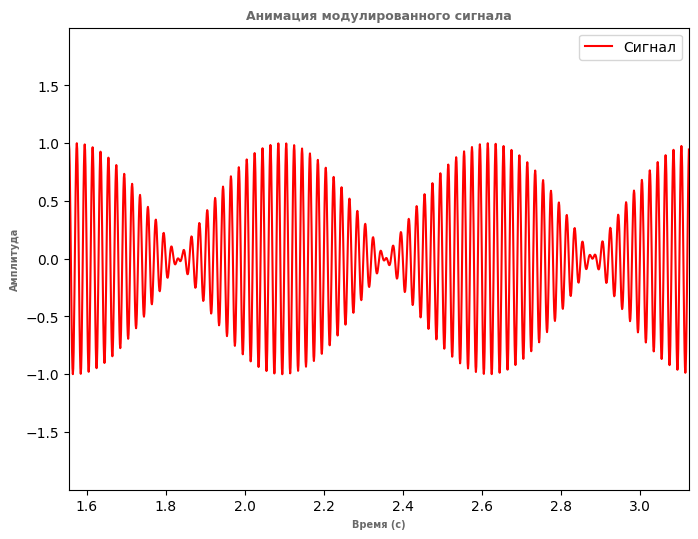

In [470]:
def modulation_function(t):
    return np.cos(t * 6)


num_frames = 100
plot_duration = np.pi / 2
time_step = 0.001
animation_step = np.pi / 200
fc = 50
save_path_with_modulation = "modulated_signal.gif"
Func_Animation = AnimateModulate(
    modulation_=modulation_function,
    fc_=fc,
    num_frames_=num_frames,
    plot_duration_=plot_duration,
    time_step_=time_step,
    animation_step_=animation_step,
    save_path_=save_path_with_modulation
)
animation = Func_Animation.create_modulation_animation()
HTML(animation.to_jshtml())

# Задача №2 Выход есть!

Волновой алгоритм (алгоритм Ли) — это метод поиска кратчайшего пути на двумерной сетке или графе. Он используется для нахождения пути между двумя точками в лабиринте, где каждая клетка может быть либо стеной (непроходимой), либо проходом (проходимой). Алгоритм основан на принципе "волнового распространения": из начальной точки (старта) волна распространяется во все стороны, постепенно заполняя доступные клетки, пока не достигнет конечной точки (финиша).

**Основные шаги алгоритма**:
1. **Инициализация**:
   - Начальная точка (старт) помечается числом `0`.
   - Все остальные клетки лабиринта инициализируются значением, обозначающим "не посещено" (например, `-1`).

2. **Распространение волны**:
   - На каждом шаге алгоритм рассматривает все клетки, помеченные текущим значением (например, `n`).
   - Для каждой такой клетки проверяются её соседи (вверх, вниз, влево, вправо). Если соседняя клетка является проходом (`1`) и ещё не посещена (значение `-1`), она помечается значением `n + 1`.
   - Процесс продолжается до тех пор, пока волна не достигнет конечной точки (финиша) или не будут обработаны все доступные клетки.

3. **Восстановление пути**:
   - Если волна достигла финиша, кратчайший путь восстанавливается "обратным ходом":
     - Начиная с финиша, двигаются к соседней клетке с меньшим значением (на единицу).
     - Процесс повторяется, пока не будет достигнут старт.
   - Если волна не достигла финиша (например, финиш окружён стенами), путь не существует.

Необходимо реализовать функцию, которая будет анимировать процесс работы волнового алгоритма для поиска пути в лабиринте. Лабиринт представлен в виде двумерного массива `numpy.ndarray`, где:
- `0` — это стена (непроходимая клетка),
- `1` — это проход (проходимая клетка).

Функция должна визуализировать процесс распространения волны и конечный путь, если он существует. Если путь не существует, функция должна сообщить об этом.

*Входные аргументы*:

- `maze` (`numpy.ndarray`) — двумерный массив, представляющий лабиринт. Элементы массива:
   - `0` — стена,
   - `1` — проход.
- `start` (`Tuple[int, int]`) — координаты начальной точки (строка, столбец).
- `end` (`Tuple[int, int]`) — координаты конечной точки (строка, столбец).
- `save_path` (`str`) — путь к файлу, в который нужно сохранить анимацию. Если строка пустая (`""`), то сохранять анимацию не нужно.

*Выходное значение*:

- Анимация - График, показывающий рабюоту волнового алгоритма.
- Файл GIF - Анимация сохраняется в файл по указанному пути save_path.

**Требования**:

В данной задаче у вас нет заготовки решения. Вы вольны решать задачу так, как считаете нужным. Однако при проверки ваших решений семинаристы будут уделять внимание следующим аспектам:

- **Правильность решения**. Важно, чтобы ваше решение работало так, как ожидается. Решение должно включать считывание данных из файла, построение диаграммы на основе считанных данных, сохранение картинки в память компьютера. Неправильно работающие решения будут оценены в 0 баллов.
- **Структура решения**. Решение должно быть аккуратным. Код должен быть разбит на логические блоки: функции или методы класса. Решение, реализованное в императивном стиле (все команды выполнены на уровне модуля) будет оценено максимум в 5 баллов из 10. При разбиении кода на логические блоки избегайте смешения логики (вычисления и построение диаграмм в одной функции или чтение данных и построение диаграммы в одной функции). Смешение логики также будет штрафоваться на усмотрение семинариста.
- **Оформление**. Оформляйте ваш код аккуратно. Используйте `flake8` вместе с конфигом из корня репозитория для проверки качества вашего кода. Также избегайте повторений. Если один и тот же код был скопирован и использован два раза, семинарист может снизить вашу оценку на свое усмотрение.

**Пример анимации**: 

![signal](./gifs/labyrinth_example.gif)

*Примечание*: Ваш вариант может отличаться от примера.

In [8]:
from typing import Callable
import matplotlib.patches as ptc
from matplotlib.ticker import MultipleLocator, FormatStrFormatter


class AnimateWaveAlgotithm:
    maze: np.ndarray
    start: tuple[int, int]
    end: tuple[int, int]
    save_path: str
    figure: plt.Figure
    axis: plt.Axes
    rects: list
    rect_size = 1
    current_step: tuple[int, int]
    num_frames: int
    circles: list
    tests: list
    mode: str
    frame_adder: int
    label_font_size: int
    text_font_size: int

    def __init__(
        self,
        maze: np.ndarray,
        start: tuple[int, int],
        end: tuple[int, int],
        save_path: str = "",
        figure_size: tuple[int, int] = (20, 20),
        label_font_size: int = 7,
        text_font_size: int = 7
    ):
        self.maze = maze
        if isinstance(self.maze, np.ndarray):
            pass
        elif isinstance(self.maze, str):
            if self.maze[-4:] == '.npy':
                self.maze = np.load(self.maze)
        else:
            raise TypeError("maze must be np.ndarray or path to .npy file")

        self.start = start
        self.end = end
        self.save_path = save_path
        self.figure, self.axis = plt.subplots(figsize=figure_size)
        self.rects = np.empty(self.maze.shape, dtype=ptc.Rectangle)

        self.circles = np.empty(self.maze.shape, dtype=ptc.Circle)
        self.circles[self.start] = ptc.Circle(self.start)
        self.current_step = self.start
        self.maze[self.current_step[0], self.current_step[1]] = 1
        self.num_frames = 1
        self.frame_adder = 1
        self.texts = np.empty(self.maze.shape, dtype=plt.Text)
        self.mode = 'go'
        self.label_font_size = label_font_size
        self.text_font_size = text_font_size
        self.next_indexes = list([self.start])

    def make_rects(self):
        for x in np.arange(self.maze.shape[1], step=1):
            for y in np.arange(self.maze.shape[0]-1, -1, step=-1):
                color = 'white' if self.maze[y][x] == 0 else 'black'
                rect = ptc.Rectangle(
                    (x-0.5, y-0.5), width=self.rect_size, height=self.rect_size, edgecolor='black', facecolor=color)
                self.rects[y][x] = rect
                self.axis.add_patch(rect)
        print('Прямоугольники готовы')

    def make_scene(self):
        self.axis.set_aspect('equal')
        self.axis.set_title("Волновой алгоритм", fontsize=14,
                            fontweight="bold", c="black")
        self.axis.set_xticks(
            np.arange(-0.5, self.maze.shape[1], step=0.5),
            labels=np.arange(-0.5, self.maze.shape[1], step=0.5),
            weight="bold",
            fontsize=self.label_font_size
        )
        self.axis.set_yticks(
            np.arange(self.maze.shape[0]-0.5, -1, step=-0.5),
            labels=np.arange(self.maze.shape[0]-0.5, -1, step=-0.5),
            weight="bold",
            fontsize=self.label_font_size
        )

        self.axis.invert_yaxis()

        self.axis.xaxis.set_major_locator(MultipleLocator(1))
        self.axis.xaxis.set_minor_locator(MultipleLocator(0.5))
        self.axis.xaxis.set_major_formatter(FormatStrFormatter('%d'))

        self.axis.yaxis.set_major_locator(MultipleLocator(1))
        self.axis.yaxis.set_minor_locator(MultipleLocator(0.5))
        self.axis.yaxis.set_major_formatter(FormatStrFormatter('%d'))

        self.axis.set_aspect('equal')
        print('Сцена готова')

    def make_a_step(self):
        new_circles_coords = list()
        new_next_indexes = list()
        text = ''
        for ind in self.next_indexes:
            for x in [-1, 1]:
                if self.maze.shape[0] > ind[0]+x >= 0 and self.maze[ind[0]+x][ind[1]] == 1 and (ind[0]+x, ind[1]) != self.start:
                    self.maze[ind[0]+x][ind[1]
                                        ] = self.maze[ind[0]][ind[1]]+1
                    new_circles_coords.append(tuple([ind[0]+x, ind[1]]))
                    self.frame_adder = 1
                    new_next_indexes.append(tuple([ind[0]+x, ind[1]]))
                    text = self.maze[ind[0]][ind[1]]+1
                if self.maze.shape[1] > ind[1]+x >= 0 and self.maze[ind[0]][ind[1]+x] == 1 and (ind[0], ind[1]+x) != self.start:
                    self.maze[ind[0]][ind[1] +
                                      x] = self.maze[ind[0]][ind[1]]+1
                    new_circles_coords.append(tuple([ind[0], ind[1]+x]))
                    self.frame_adder = 1
                    text = self.maze[ind[0]][ind[1]]+1
                    new_next_indexes.append(tuple([ind[0], ind[1]+x]))

        self.next_indexes = list(set(new_next_indexes))
        if self.end in self.next_indexes:
            print("Выход найден")
            self.mode = 'go back'
            self.next_indexes = self.end
        elif 1 not in self.maze:
            self.frame_adder = 0
            self.axis.set_title("Волновой алгоритм - Выхода нет!", fontsize=14,
                                fontweight="bold", c="black")

        return (set(new_circles_coords), str(text))

    def make_a_step_back(self):
        if self.start == self.next_indexes:
            self.frame_adder = -1
            return []
        ind = self.next_indexes
        for x in [-1, 1]:
            if self.maze.shape[1] > ind[1]+x >= 0 and self.maze[ind[0]][ind[1]+x] == self.maze[ind[0]][ind[1]]-1:
                self.frame_adder = 1
                self.next_indexes = tuple([ind[0], ind[1]+x])

            elif self.maze.shape[0] > ind[0]+x >= 0 and self.maze[ind[0]+x][ind[1]] == (self.maze[ind[0]][ind[1]])-1:
                self.frame_adder = 1
                self.next_indexes = tuple([ind[0]+x, ind[1]])

        return tuple(self.next_indexes)

    def frame_generator(self):
        frame = 0
        if self.frame_adder == -1:
            return
        while self.frame_adder == 1:
            frame += self.frame_adder
            yield frame

    def update_frame(
        self,
        frame_id: int
    ) -> tuple:
        artists = []
        if frame_id == 1 and self.circles[(self.start[1], self.start[0])] == None:
            circle = plt.Circle(
                xy=(self.start[1], self.start[0]), radius=0.2, facecolor='yellow')
            self.circles[(self.start[1], self.start[0])] = circle
            self.axis.add_patch(circle)
            text = self.axis.text(x=self.start[1],
                                  y=self.start[0],
                                  s=1,
                                  ha='center', va='center',
                                  fontsize=self.text_font_size, weight='bold',
                                  color='black')
            self.texts[(self.start[1], self.start[0])] = text
            artists.append(text)
            return circle,
        elif frame_id == 1:
            return ()
        if self.mode == 'go':
            result = self.make_a_step()
            circles = result[0]
            text_str = result[1]

            for ind in circles:
                color = 'yellow' if ind == self.end else 'red'
                circle = plt.Circle(xy=(ind[1], ind[0]),
                                    radius=0.2,
                                    facecolor=color)
                artists.append(circle)
                self.circles[ind] = circle
                self.axis.add_patch(circle)
                text = self.axis.text(x=ind[1],
                                      y=ind[0],
                                      s=text_str,
                                      ha='center', va='center',
                                      fontsize=self.text_font_size, weight='bold',
                                      color='black')
                self.texts[ind] = text
                artists.append(text)
            return tuple(artists)

        if self.mode == 'go back':
            result = self.make_a_step_back()
            color = result
            if color:
                self.circles[color].set_color('green')
                artists.append(self.circles[color])

            return tuple(artists)
        return ()

    def animate_wave_algorithm(
        self
    ) -> FuncAnimation:
        self.make_scene()
        self.make_rects()
        animation = FuncAnimation(
            self.figure,
            self.update_frame,
            frames=self.frame_generator(),
            interval=50,
            blit=True,
            save_count=self.maze.size
        )
        animation.save(self.save_path, writer="pillow", fps=10)
        return animation

In [ ]:
maze = np.array([
    [0, 0, 0, 0, 0, 1, 1],
    [1, 1, 1, 1, 1, 1, 0],
    [1, 1, 1, 1, 1, 1, 0],
    [1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 1, 1, 1, 1],
    [0, 0, 0, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0],
])
# maze = np.ones((1, 10))

start = (2, 0)
end = (0, 6)


start = (101, 43)
end = (0, 18)
# end = (43, 73)
save_path = "labyrinth.gif"  # Укажите путь для сохранения анимации
plt.rcParams['animation.embed_limit'] = 1000
maze = r'N:\Educ\INF\Python sem2\python_mipt_dafe\lessons\sem_02\lesson_08\test_data\maze.npy'
a_wa = AnimateWaveAlgotithm(maze=maze, start=start, end=end, save_path=save_path, figure_size=(
    20, 20), label_font_size=9, text_font_size=0)
animation = a_wa.animate_wave_algorithm()
HTML(animation.to_jshtml())

Сцена готова
Прямоугольники готовы
Выход найден
